# O Efeito da Experiência e Ferramentas na Compensação de Desenvolvedores

## Descrição do Projeto

Este projeto investiga os fatores que influenciam a compensação financeira de desenvolvedores de software, com base nos dados globais da pesquisa Stack Overflow de 2023. O fenômeno central da análise é entender como a experiência profissional (`YearsCodePro`) e a escolha de ferramentas, especificamente os Sistemas Operacionais (SO), se correlacionam a compensação anual (`ConvertedCompYearly`).

A partir dos dados da pesquisa, exploraremos:

* A distribuição e a variabilidade da compensação anual e anos de experiência profissional entre desenvolvedores.
* O impacto direto dos anos de experiência profissional sobre os níveis de remuneração.
* A existência de diferenças salariais estatisticamente significativas entre desenvolvedores que utilizam diferentes SOs.
* Identificar quais SOs estão associados aos maiores e menores salários.

Os dados serão cuidadosamente pré-processados, com tratamento de valores ausentes, conversão de tipos de dados para análise numérica e limpeza de outliers que possam distorcer os resultados. A análise descritiva buscará revelar os padrões de remuneração e uso de ferramentas na comunidade de desenvolvimento, enquanto os testes de hipóteses irão validar formalmente as diferenças observadas.

O objetivo final é fornecer insights claros sobre como a progressão na carreira e a especialização em certas ferramentas se refletem no potencial de ganhos de um profissional de tecnologia, com aplicações para orientação de carreira, negociação salarial e entendimento de tendências de mercado.

## Dependências

In [1]:
!pip install pandas seaborn matplotlib numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 73.8 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

## Pré-processamento dos Dados

Nesta seção, realizamos a preparação e limpeza dos dados da pesquisa **Stack Overflow 2023** para garantir a qualidade e a precisão da análise. As etapas incluem:

* **Seleção de Variáveis de Interesse:** Foco nas colunas essenciais para o escopo do projeto, como `YearsCodePro`, `ConvertedCompYearly` e as colunas relacionadas aos Sistemas Operacionais (SO).

* **Análise e Conversão de Tipos:** Transformação de colunas de texto (`object`) para formatos numéricos. Por exemplo, `YearsCodePro` e `ConvertedCompYearly` são convertidos para números para possibilitar cálculos estatísticos.

* **Tratamento de Dados Ausentes (`NaN`):** Remoção de linhas onde informações cruciais para a análise (como salário ou anos de experiência) não foram preenchidas, evitando distorções nos resultados.

* **Processamento de Colunas Categóricas:** Simplificação e agrupamento de dados em colunas com múltiplas respostas (como a de tecnologias), para permitir comparações claras e eficazes.

* **Limpeza de Outliers:** Identificação e remoção de valores extremos e irreais na coluna de salários (`ConvertedCompYearly`), que poderiam enviesar as médias e outras métricas descritivas.

* **Discretização de Colunas:**  Para facilitar a análise e a visualização de tendências, a variável numérica contínua ConvertedCompYearly foi convertida em uma variável categórica.

* **Normalização de Dados (Min-Max Scaling):** Como etapa de preparação para modelagem de machine learning, as principais variáveis numéricas (YearsCodePro e ConvertedCompYearly) foram normalizadas. 

In [3]:
path_arquivo : str = "../dados/2023/survey_results_public.csv"
df : pd.DataFrame = pd.read_csv(path_arquivo, sep = ',')
print(f"Tamanho do dataset: {len(df)}")
df.head(5)

Tamanho do dataset: 89184


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
colunas_interesse : list[str] = ["ResponseId","YearsCodePro","OpSysProfessional use","ConvertedCompYearly"]
df_proc : pd.DataFrame = df[colunas_interesse].copy()
print(f"Tamanho do dataset: {len(df_proc)}")
df_proc = df_proc.replace('NaN', pd.NA).dropna()
print(f"Tamanho do dataset: {len(df_proc)}")
mascara_other: pd.Series = df_proc['OpSysProfessional use'].str.contains("Other (Please Specify):", regex=False, na=False)
df_proc = df_proc[~mascara_other].copy()
print(f"Tamanho do dataset: {len(df_proc)}")
df_proc.head(10)


Tamanho do dataset: 89184
Tamanho do dataset: 44876
Tamanho do dataset: 43979


,ResponseId,YearsCodePro,OpSysProfessional use,ConvertedCompYearly
1,2,9,MacOS;Windows;Windows Subsystem for Linux (WSL),285000.0
2,3,23,MacOS;Other Linux-based,250000.0
3,4,7,iOS;iPadOS;MacOS,156000.0
5,6,21,MacOS,96828.0
6,7,3,MacOS,135000.0
7,8,3,MacOS;Ubuntu;Windows,80000.0
8,9,15,Ubuntu;Windows;Windows Subsystem for Linux (WSL),64254.0
11,12,9,Windows,78003.0
12,13,9,Arch;Debian;Ubuntu,75000.0
13,14,Less than 1 year,MacOS;Ubuntu,150000.0


In [5]:
tipos_de_dados = {
    'YearsCodePro': 'int32',
    'ConvertedCompYearly': 'int64',
    'OpSysProfessional use': 'category'
}
df_proc['YearsCodePro'] = df_proc['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_proc = df_proc.astype(tipos_de_dados)
df_proc.head(10)

,ResponseId,YearsCodePro,OpSysProfessional use,ConvertedCompYearly
1,2,9,MacOS;Windows;Windows Subsystem for Linux (WSL),285000
2,3,23,MacOS;Other Linux-based,250000
3,4,7,iOS;iPadOS;MacOS,156000
5,6,21,MacOS,96828
6,7,3,MacOS,135000
7,8,3,MacOS;Ubuntu;Windows,80000
8,9,15,Ubuntu;Windows;Windows Subsystem for Linux (WSL),64254
11,12,9,Windows,78003
12,13,9,Arch;Debian;Ubuntu,75000
13,14,0,MacOS;Ubuntu,150000


In [6]:
os_dummies:  pd.DataFrame= df_proc['OpSysProfessional use'].str.get_dummies(sep=";")
os_dummies = os_dummies.astype(bool)
df_proc = pd.concat([df_proc, os_dummies], axis=1)
df_proc.head(10)

,ResponseId,YearsCodePro,OpSysProfessional use,ConvertedCompYearly,AIX,Android,Arch,BSD,ChromeOS,Cygwin,...,Haiku,MacOS,Other Linux-based,Red Hat,Solaris,Ubuntu,Windows,Windows Subsystem for Linux (WSL),iOS,iPadOS
1,2,9,MacOS;Windows;Windows Subsystem for Linux (WSL),285000,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,3,23,MacOS;Other Linux-based,250000,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,4,7,iOS;iPadOS;MacOS,156000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
5,6,21,MacOS,96828,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,7,3,MacOS,135000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,8,3,MacOS;Ubuntu;Windows,80000,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
8,9,15,Ubuntu;Windows;Windows Subsystem for Linux (WSL),64254,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
11,12,9,Windows,78003,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12,13,9,Arch;Debian;Ubuntu,75000,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13,14,0,MacOS;Ubuntu,150000,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [7]:
sns.set_style("whitegrid")

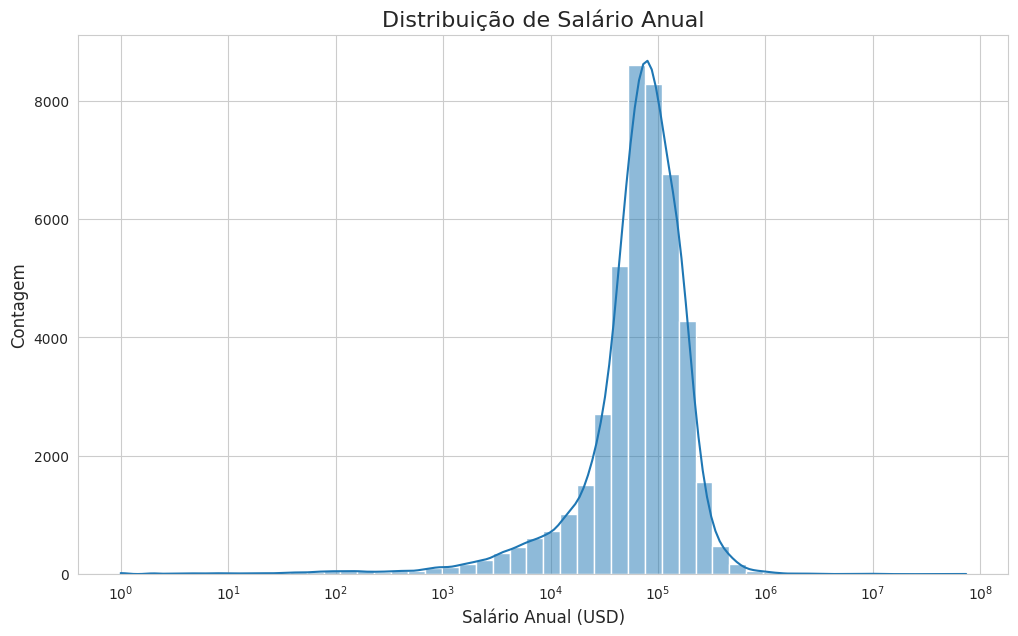

In [8]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc, x='ConvertedCompYearly', bins=50, log_scale=True, kde=True)
plt.title('Distribuição de Salário Anual', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

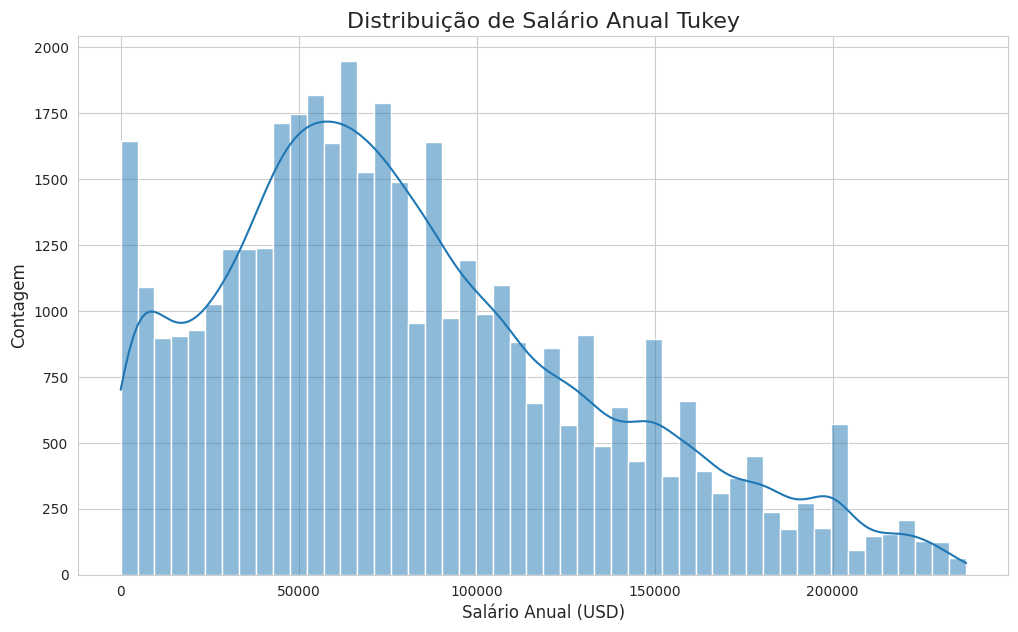

In [9]:
Q1 = df_proc['ConvertedCompYearly'].quantile(0.25)
Q3 = df_proc['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
limite_superior_tukey = Q3 + 1.5 * IQR
limite_inferior_tukey = Q1 - 1.5 * IQR
df_proc_tukey_salario = df_proc[(df_proc['ConvertedCompYearly'] <= limite_superior_tukey) & (df_proc['ConvertedCompYearly'] >= limite_inferior_tukey)].copy()
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc_tukey_salario, x='ConvertedCompYearly', bins=50, kde=True)
plt.title('Distribuição de Salário Anual Tukey', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

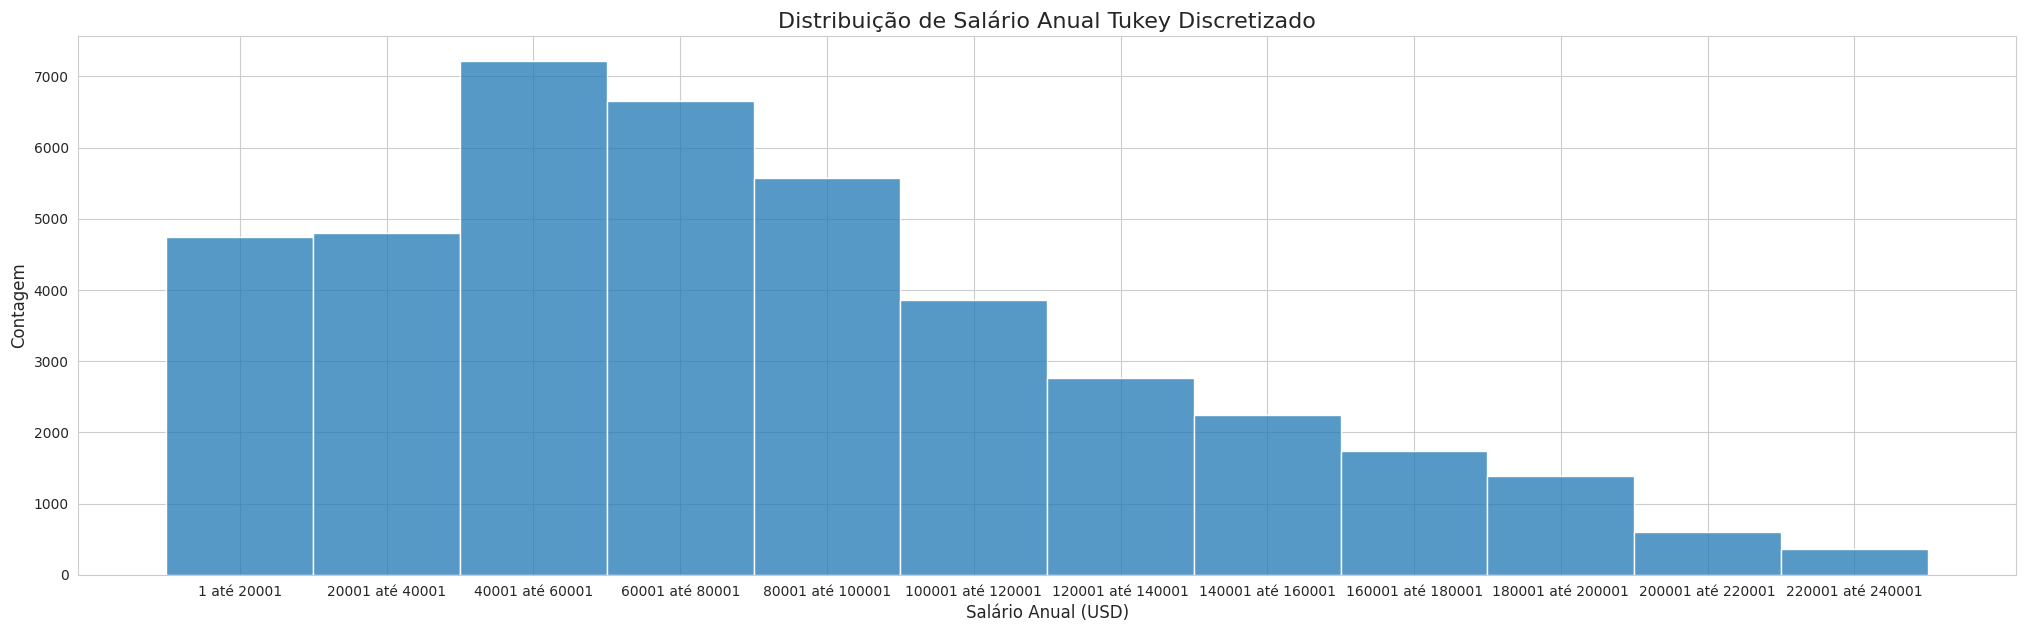

In [10]:
limites_dinamicos = np.arange(df_proc_tukey_salario['ConvertedCompYearly'].min(),  df_proc_tukey_salario['ConvertedCompYearly'].max() + 20000, 20000)
rotulos_dinamicos = [f"{limites_dinamicos[i]:.0f} até {limites_dinamicos[i+1]:.0f}" for i in range(len(limites_dinamicos) - 1)]
df_proc_tukey_salario['ConvertedCompYearlyDisc'] = pd.cut(
    df_proc_tukey_salario['ConvertedCompYearly'],
    bins= limites_dinamicos,
    labels=rotulos_dinamicos,
    right=False,
    include_lowest=True
)
plt.figure(figsize=(25, 7))
sns.histplot(data=df_proc_tukey_salario, x='ConvertedCompYearlyDisc')
plt.title('Distribuição de Salário Anual Tukey Discretizado', fontsize=16)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

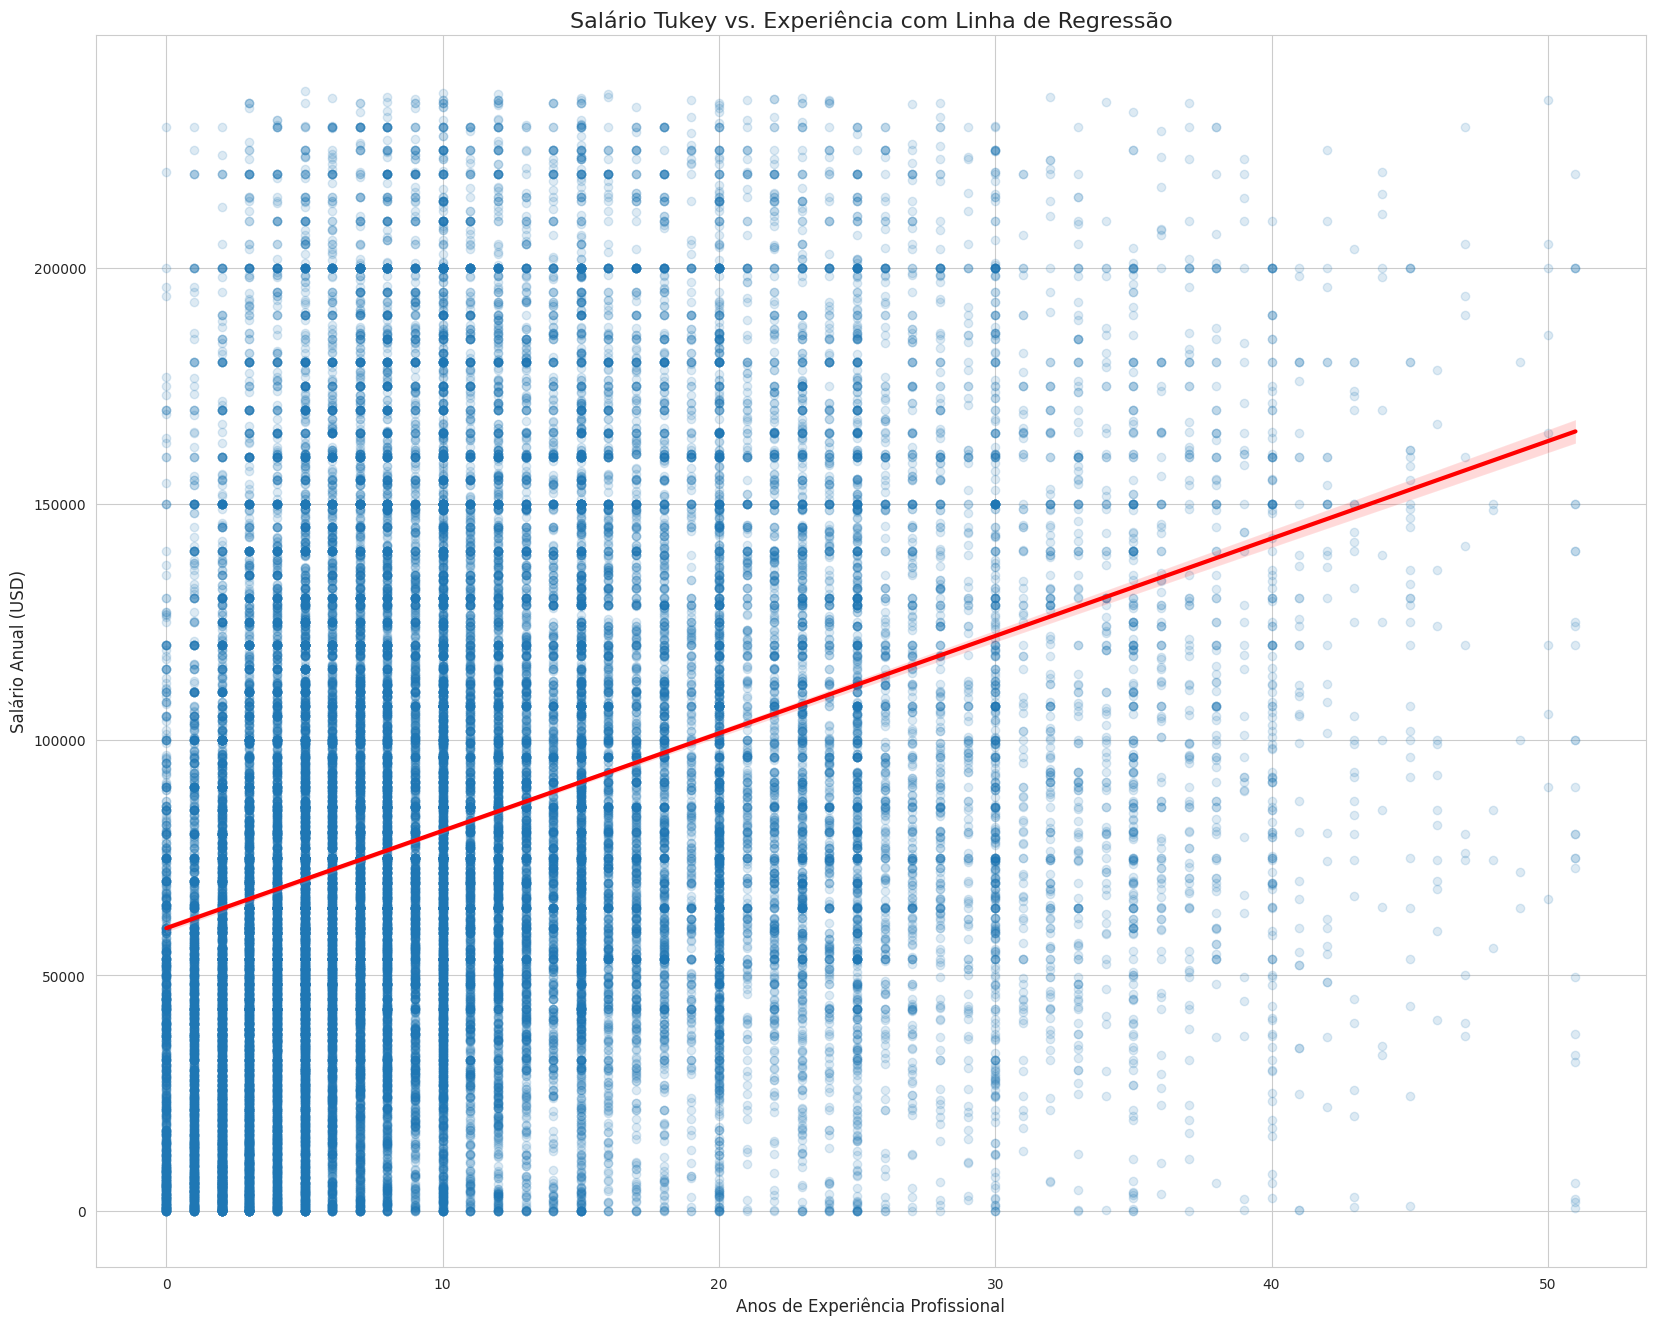

In [11]:
plt.figure(figsize=(20, 16))
sns.regplot(
    data=df_proc_tukey_salario, 
    x='YearsCodePro', 
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.15}, 
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Salário Tukey vs. Experiência com Linha de Regressão', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.grid(True)
plt.show()

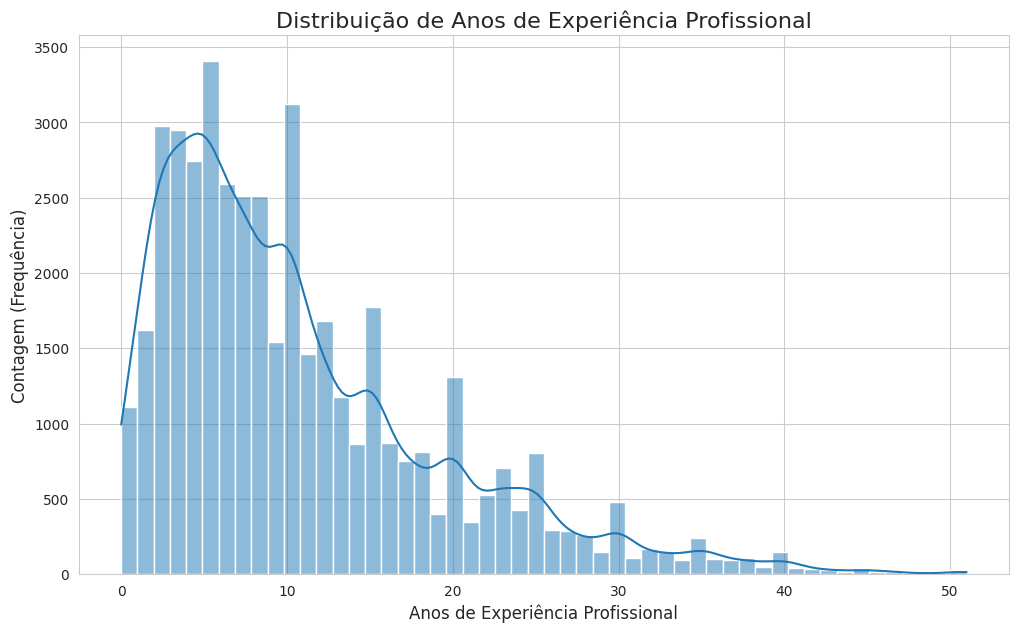

In [12]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc, x='YearsCodePro', bins=52, kde=True)
plt.title('Distribuição de Anos de Experiência Profissional', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Contagem (Frequência)', fontsize=12)
plt.show()

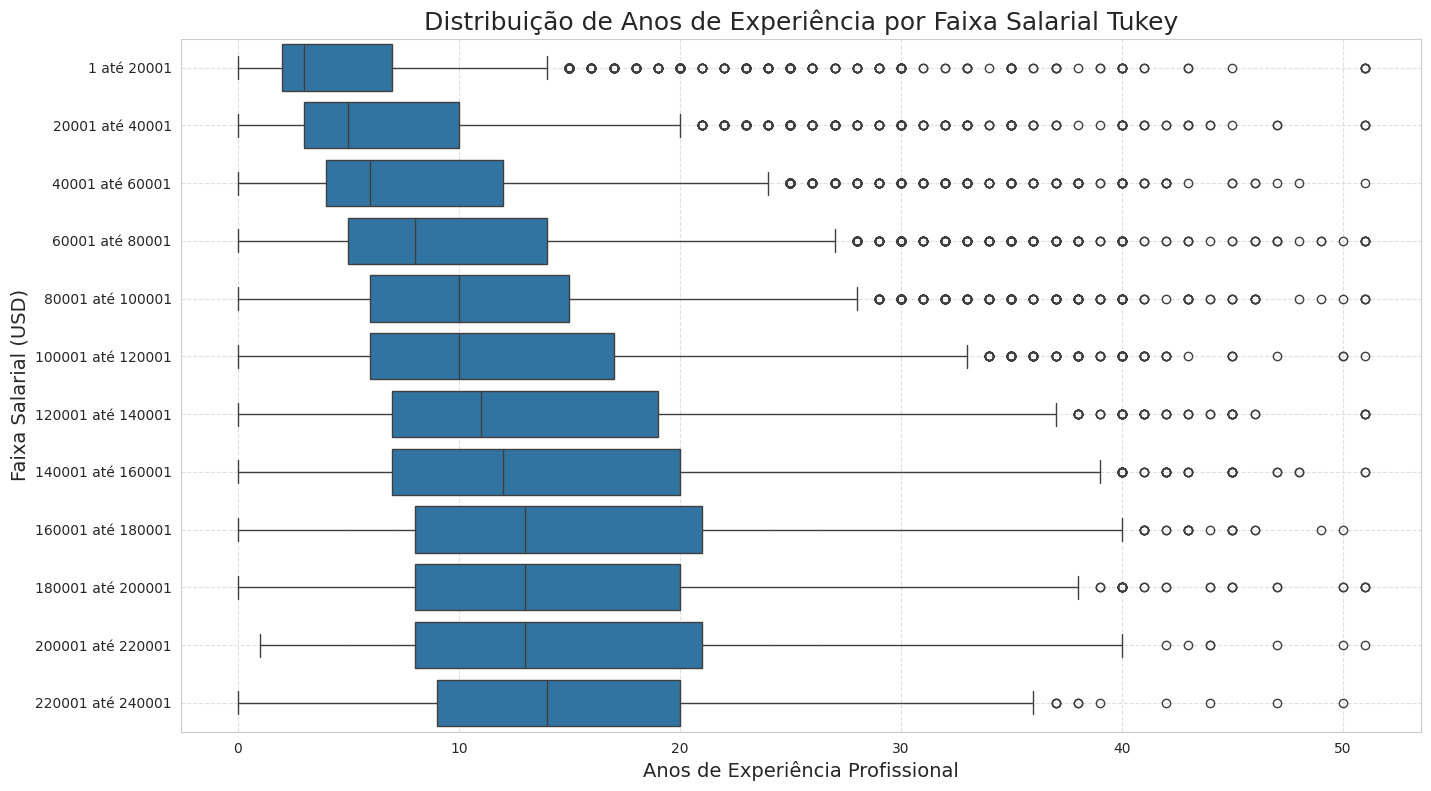

In [13]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=df_proc_tukey_salario,
    x='YearsCodePro',
    y='ConvertedCompYearlyDisc',
    order=rotulos_dinamicos
)

plt.title('Distribuição de Anos de Experiência por Faixa Salarial Tukey', fontsize=18)
plt.xlabel('Anos de Experiência Profissional', fontsize=14)
plt.ylabel('Faixa Salarial (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

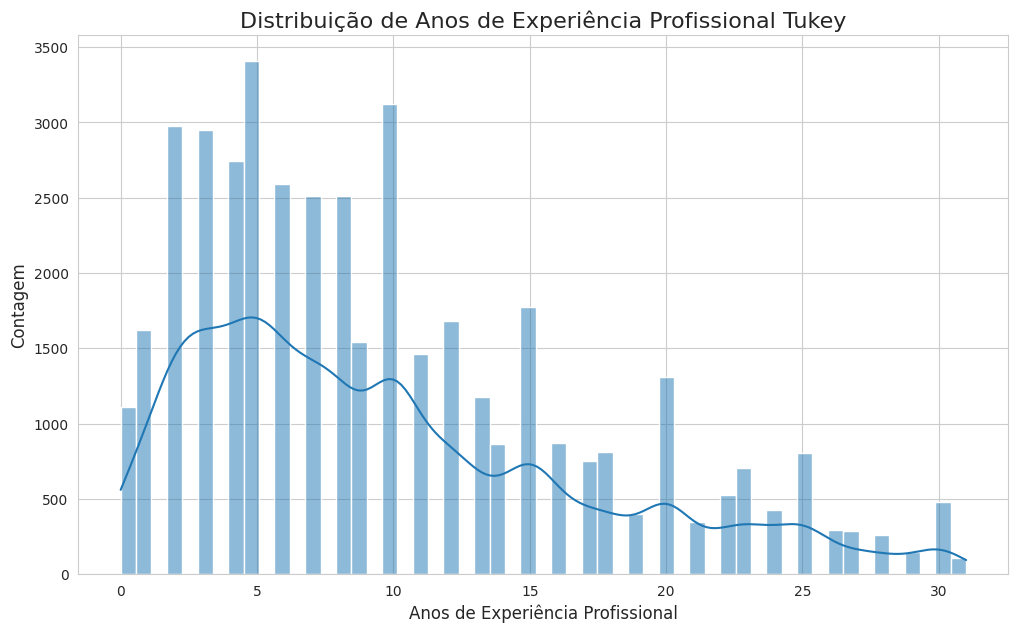

In [14]:
Q1 = df_proc['YearsCodePro'].quantile(0.25)
Q3 = df_proc['YearsCodePro'].quantile(0.75)
IQR = Q3 - Q1
limite_superior_tukey : float = Q3 + 1.5 * IQR
limite_inferior_tukey : float = Q1 - 1.5 * IQR
df_proc_tukey_anos : pd.DataFrame = df_proc[(df_proc['YearsCodePro'] <= limite_superior_tukey) & (df_proc['YearsCodePro'] >= limite_inferior_tukey)].copy()
plt.figure(figsize=(12, 7))
sns.histplot(data=df_proc_tukey_anos, x='YearsCodePro', kde=True)
plt.title('Distribuição de Anos de Experiência Profissional Tukey', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

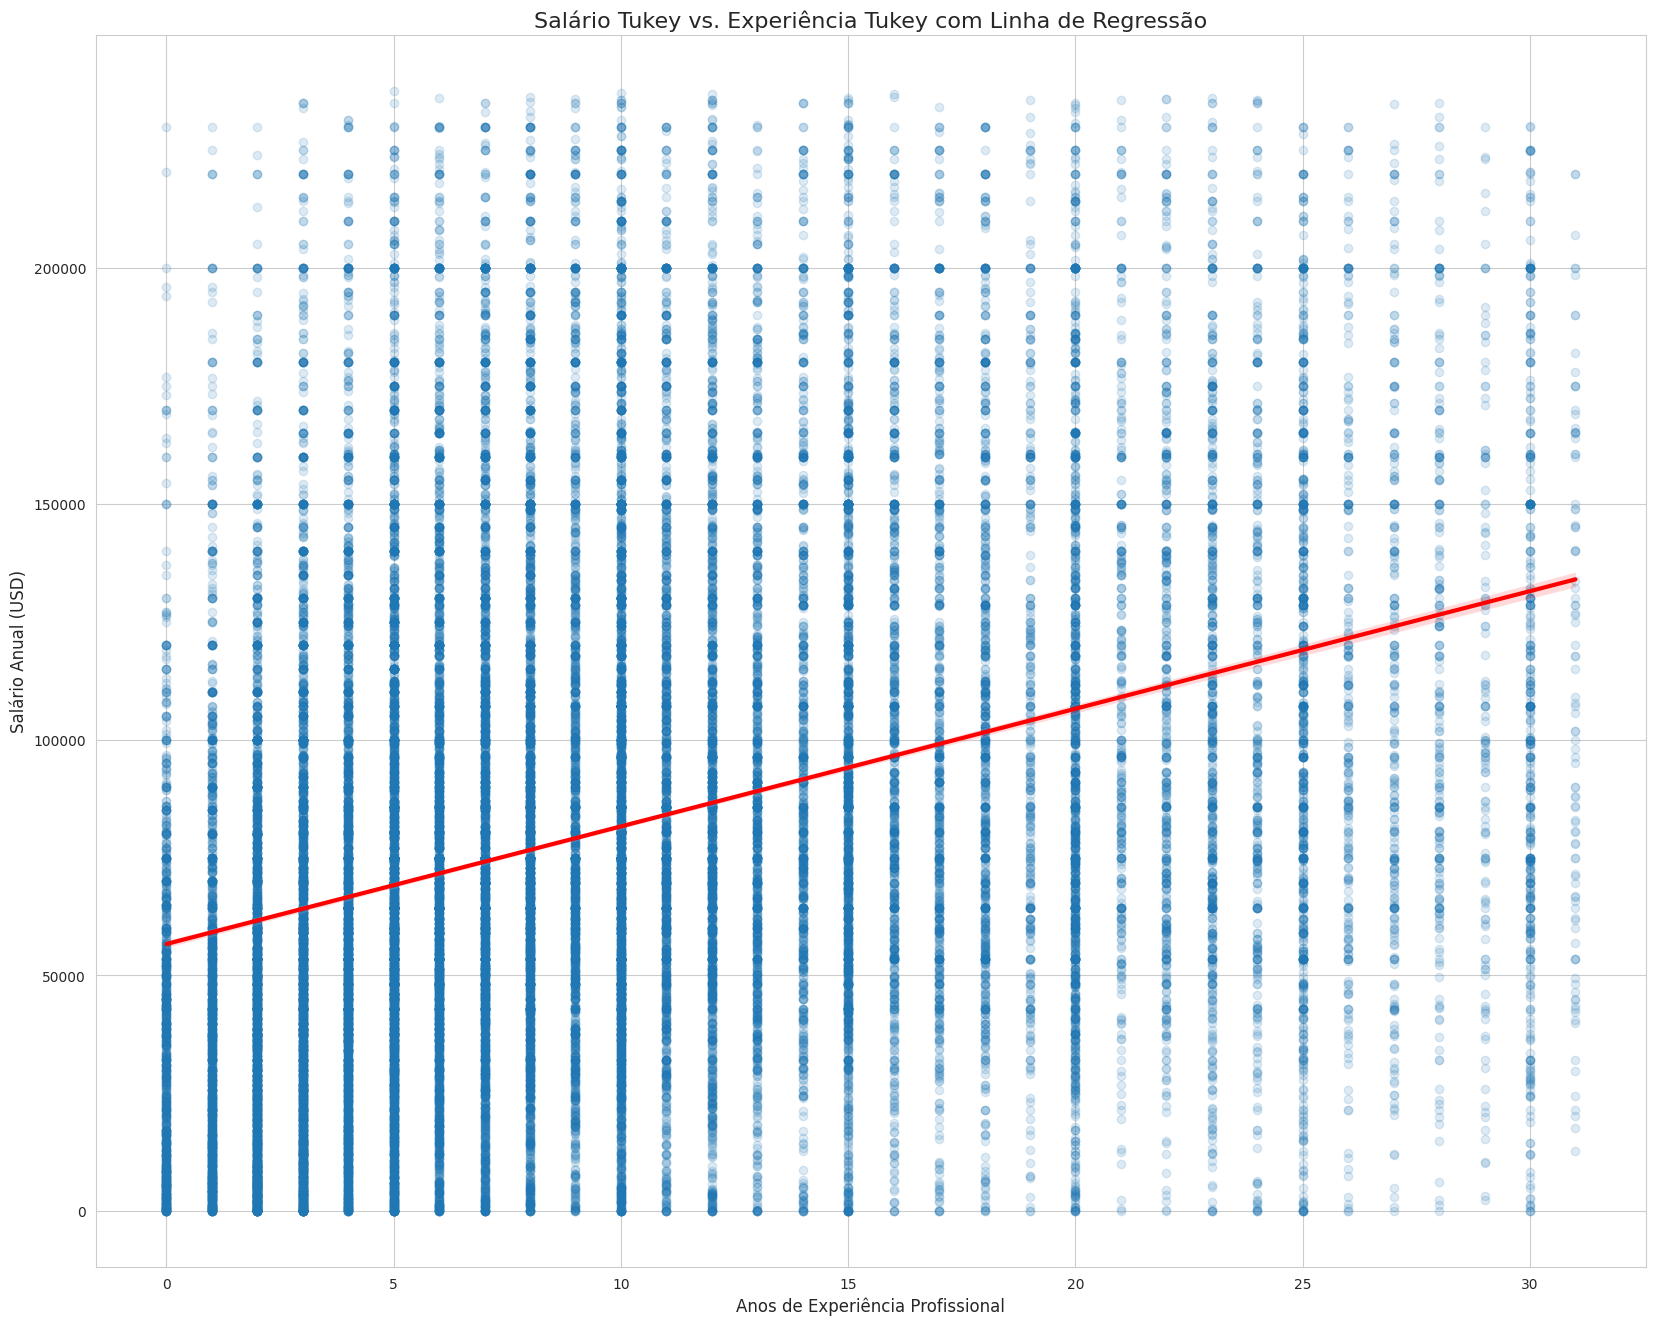

In [15]:
plt.figure(figsize=(20, 16))
# A função regplot faz tudo de uma vez
# scatter_kws={'alpha': 0.2} deixa os pontos transparentes para lidar com a sobreposição
# line_kws={'color': 'red'} customiza a cor da linha
df_proc_tukey_salario_anos : pd.DataFrame = df_proc_tukey_salario[(df_proc_tukey_salario['YearsCodePro'] <= limite_superior_tukey) & (df_proc_tukey_salario['YearsCodePro'] >= limite_inferior_tukey)].copy()
sns.regplot(
    data=df_proc_tukey_salario_anos, 
    x='YearsCodePro', 
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.15}, 
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Salário Tukey vs. Experiência Tukey com Linha de Regressão', fontsize=16)
plt.xlabel('Anos de Experiência Profissional', fontsize=12)
plt.ylabel('Salário Anual (USD)', fontsize=12)
plt.grid(True)
plt.show()

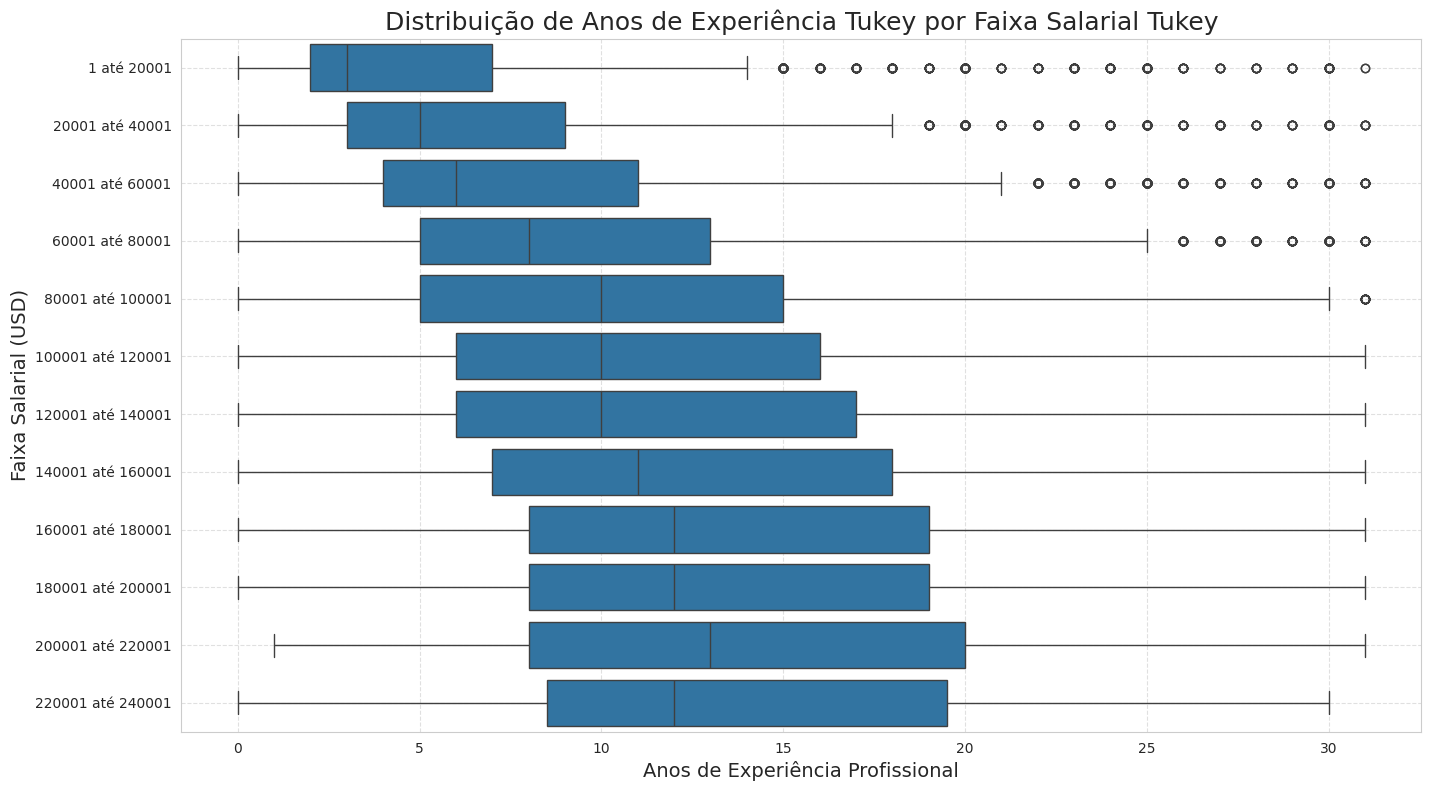

In [16]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=df_proc_tukey_salario_anos,
    x='YearsCodePro',
    y='ConvertedCompYearlyDisc',
    order=rotulos_dinamicos
)

plt.title('Distribuição de Anos de Experiência Tukey por Faixa Salarial Tukey', fontsize=18)
plt.xlabel('Anos de Experiência Profissional', fontsize=14)
plt.ylabel('Faixa Salarial (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
df_proc_tukey_salario_anos_normalizados : pd.DataFrame = df_proc_tukey_salario_anos.copy()
colunas_para_normalizar : list[str] = ['YearsCodePro', 'ConvertedCompYearly']
scaler = skl.preprocessing.MinMaxScaler()
df_proc_tukey_salario_anos_normalizados[colunas_para_normalizar] = scaler.fit_transform(df_proc_tukey_salario_anos_normalizados[colunas_para_normalizar])